# MAIN PROJECT - **FITNESS TRACKER SYSTEM**

# **HARITHA P V - MST003-058**




## This project focuses on developing and evaluating predictive models for a fitness tracking dataset, aiming to forecast daily step counts. We employed various regression techniques, including Polynomial Regression and Random Forest, to assess their performance and accuracy. By comparing these models, we aimed to determine the most effective approach for predicting fitness metrics. The project demonstrates the practical application of machine learning techniques in fitness data analysis and model optimization.

# 1. Importing Libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestRegressor


# 2. Data Loading and Exploration

In [ ]:
#Loading Data from CSV File into a DataFrame
df=pd.read_csv("/content/drive/MyDrive/Main_Project_Scifor/fitness_dataset.csv")

In [ ]:
#Checking the Dimensions of the DataFrame
df.shape

(12625, 18)

Rows: 12,625 – This indicates that there are 12,625 individual records or observations in the dataset.

Columns: 18 – This indicates that there are 18 features or attributes in each record.

In [ ]:
#Dataframe
df

,TotalSteps,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalActiveMinutes,TotalDistance,ActivityDayName,TotalMinutesAsleep,TotalTimeInBed,WeightKg,Heightm,BMI
0,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,327,346,119.653280,1.832444,35.633890
1,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,750,775,119.653280,1.832444,35.633890
2,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,503,546,119.653280,1.832444,35.633890
3,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,274,469,119.653280,1.832444,35.633890
4,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,501,541,119.653280,1.832444,35.633890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12620,8064,1849,770,137,1,23,0.0,4.25,0.04,1.82,161,6.11,Thursday,404,442,42.258115,1.518605,18.324003
12621,8064,1849,770,137,1,23,0.0,4.25,0.04,1.82,161,6.11,Thursday,438,475,42.258115,1.518605,18.324003
12622,8064,1849,770,137,1,23,0.0,4.25,0.04,1.82,161,6.11,Thursday,516,535,42.258115,1.518605,18.324003
12623,8064,1849,770,137,1,23,0.0,4.25,0.04,1.82,161,6.11,Thursday,444,457,42.258115,1.518605,18.324003


In [ ]:
#Generating Summary Statistics for the DataFrame
df.describe()

,TotalSteps,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalActiveMinutes,TotalDistance,TotalMinutesAsleep,TotalTimeInBed,WeightKg,Heightm,BMI
count,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000
mean,7677.291564,2315.398495,992.791446,194.197545,13.660436,21.265822,0.001589,3.360555,0.570082,1.507958,229.123802,5.438596,419.308990,458.611327,79.452327,1.709165,27.307621
std,5106.688864,710.280611,298.075854,109.087189,20.030390,33.115259,0.007336,2.044217,0.882671,2.686800,121.619151,3.952713,118.507042,127.342981,22.823911,0.149948,7.688076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,61.000000,42.258115,1.406053,15.807240
25%,3821.000000,1838.000000,730.000000,129.000000,0.000000,0.000000,0.000000,1.960000,0.000000,0.000000,149.000000,2.590000,361.000000,403.000000,58.596953,1.621623,21.478784
50%,7412.000000,2150.000000,1057.000000,199.000000,7.000000,4.000000,0.000000,3.380000,0.240000,0.210000,248.000000,5.180000,432.000000,463.000000,79.619745,1.719187,26.143626
75%,10735.000000,2796.000000,1229.000000,266.000000,20.000000,32.000000,0.000000,4.790000,0.810000,2.040000,318.000000,7.670000,490.000000,526.000000,99.942953,1.827889,32.423042
max,36019.000000,4900.000000,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000,552.000000,28.020000,796.000000,961.000000,119.653280,1.947905,43.809777


In [ ]:
#Displaying Information About the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12625 entries, 0 to 12624
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalSteps                12625 non-null  int64  
 1   Calories                  12625 non-null  int64  
 2   SedentaryMinutes          12625 non-null  int64  
 3   LightlyActiveMinutes      12625 non-null  int64  
 4   FairlyActiveMinutes       12625 non-null  int64  
 5   VeryActiveMinutes         12625 non-null  int64  
 6   SedentaryActiveDistance   12625 non-null  float64
 7   LightActiveDistance       12625 non-null  float64
 8   ModeratelyActiveDistance  12625 non-null  float64
 9   VeryActiveDistance        12625 non-null  float64
 10  TotalActiveMinutes        12625 non-null  int64  
 11  TotalDistance             12625 non-null  float64
 12  ActivityDayName           12625 non-null  object 
 13  TotalMinutesAsleep        12625 non-null  int64  
 14  TotalT

# 3. Data Cleaning

## Handling Missing Values and Duplicates

In [ ]:
#Identifying and Counting Duplicate Rows in the DataFrame
duplicates_sum = df.duplicated().sum()
print("Number of duplicate rows:", duplicates_sum)

Number of duplicate rows: 122


There are 122 duplicate rows in the dataset. This means that there are 122 records in the DataFrame that are identical across all columns.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Checking for Missing Values in the DataFrame
df.isnull().sum()

,0
TotalSteps,0
Calories,0
SedentaryMinutes,0
LightlyActiveMinutes,0
FairlyActiveMinutes,0
VeryActiveMinutes,0
SedentaryActiveDistance,0
LightActiveDistance,0
ModeratelyActiveDistance,0
VeryActiveDistance,0


## Feature Engineering

In [ ]:
#Creating New Columns for Total Distance, Total Minutes, and Total Active Minutes

df = df.assign(
    TotalActiveMinutes = df.LightlyActiveMinutes + df.FairlyActiveMinutes + df.VeryActiveMinutes,
    TotalDistance = df.LightActiveDistance + df.ModeratelyActiveDistance + df.VeryActiveDistance)


In [ ]:
# Dropping Unnecessary Columns from the DataFrame
df.drop(['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance',
         'ModeratelyActiveDistance', 'VeryActiveDistance','TotalTimeInBed','BMI'],inplace = True,axis = 1)

In [ ]:
# Renaming Columns in the DataFrame
df = df.rename(columns={'Calories': 'CaloriesBurnt','TotalDistance':'TotalDistancekm','ActivityDayName':'ActivityDay'})

In [ ]:
# Generate random values for age group
age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = np.random.choice(age_groups, size=len(df))

# Generate random values for gender
genders = ['Male', 'Female']
df['Gender'] = np.random.choice(genders, size=len(df))

In [ ]:
# Converting Columns to Categorical Data Type
for col in ['AgeGroup', 'Gender', 'ActivityDay']:
  df[col] = df[col].astype('category')

In [ ]:
df = df[['AgeGroup','Gender', 'WeightKg', 'Heightm', 'ActivityDay',  'TotalMinutesAsleep',
       'SedentaryMinutes', 'TotalActiveMinutes','TotalDistancekm','CaloriesBurnt','TotalSteps' ]]


In [ ]:
df

,AgeGroup,Gender,WeightKg,Heightm,ActivityDay,TotalMinutesAsleep,SedentaryMinutes,TotalActiveMinutes,TotalDistancekm,CaloriesBurnt,TotalSteps
0,25-34,Female,119.653280,1.832444,Tuesday,327,728,366,8.49,1985,13162
1,45-54,Male,119.653280,1.832444,Tuesday,750,728,366,8.49,1985,13162
2,65+,Female,119.653280,1.832444,Tuesday,503,728,366,8.49,1985,13162
3,45-54,Female,119.653280,1.832444,Tuesday,274,728,366,8.49,1985,13162
4,55-64,Female,119.653280,1.832444,Tuesday,501,728,366,8.49,1985,13162
...,...,...,...,...,...,...,...,...,...,...,...
12620,65+,Female,42.258115,1.518605,Thursday,404,770,161,6.11,1849,8064
12621,55-64,Female,42.258115,1.518605,Thursday,438,770,161,6.11,1849,8064
12622,65+,Female,42.258115,1.518605,Thursday,516,770,161,6.11,1849,8064
12623,65+,Male,42.258115,1.518605,Thursday,444,770,161,6.11,1849,8064


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12503 entries, 0 to 12624
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AgeGroup            12503 non-null  category
 1   Gender              12503 non-null  category
 2   WeightKg            12503 non-null  float64 
 3   Heightm             12503 non-null  float64 
 4   ActivityDay         12503 non-null  category
 5   TotalMinutesAsleep  12503 non-null  int64   
 6   SedentaryMinutes    12503 non-null  int64   
 7   TotalActiveMinutes  12503 non-null  int64   
 8   TotalDistancekm     12503 non-null  float64 
 9   CaloriesBurnt       12503 non-null  int64   
 10  TotalSteps          12503 non-null  int64   
dtypes: category(3), float64(3), int64(5)
memory usage: 916.4 KB


Here is a brief description of each column:

**AgeGroup:**Categorizes participants into different age groups, such as young, middle-aged, or senior.

**Gender:** Indicates the gender of the participants, typically categorized as male or female.

**WeightKg:** Represents the weight of each participant in kilograms, measured as a floating-point number.

**Heightm:** Represents the height of each participant in meters, also measured as a floating-point number.

**ActivityDay:** Categorizes the day of the week on which the activity data was recorded.

**TotalMinutesAsleep:** Records the total number of minutes each participant slept during the day, measured as an integer.

**SedentaryMinutes:** Indicates the total number of minutes each participant spent being sedentary, measured as an integer.

**TotalActiveMinutes:** Shows the total number of minutes each participant was physically active during the day, measured as an integer.

**TotalDistancekm:** Represents the total distance each participant traveled during the day, measured in kilometers as a floating-point number.

**CaloriesBurnt:** Records the total number of calories burnt by each participant during the day, measured as an integer.

**TotalSteps:** Shows the total number of steps taken by each participant during the day, measured as an integer.

In [ ]:
#df.to_csv('Fitness_tracker_dataset.csv', index=False)

In [ ]:
#from google.colab import files

# Download the file
#files.download('Fitness_tracker_dataset.csv')

## Outlier Detection and Removal

In [ ]:
#Calculating Quartiles and Interquartile Range (IQR) for Selected Numeric Columns
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Select only numeric columns
target_columns = ['TotalSteps', 'TotalDistancekm','TotalActiveMinutes','TotalMinutesAsleep','SedentaryMinutes','CaloriesBurnt']
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the target columns
Q1 = df[target_columns].quantile(0.25)
Q3 = df[target_columns].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

In [ ]:
#Filtering Outliers from DataFrame Based on IQR for Selected Columns
# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter the DataFrame to remove outliers based on the target columns
df_cleaned = df[~((df[target_columns] < lower_bound) | (df[target_columns] > upper_bound)).any(axis=1)]


In [ ]:
# Check the size of the DataFrame after removing outliers
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")

# Display summary statistics of the cleaned DataFrame
print(df_cleaned.describe())

Original DataFrame size: (12503, 11)
Cleaned DataFrame size: (11195, 11)
           WeightKg       Heightm  TotalMinutesAsleep  SedentaryMinutes  \
count  11195.000000  11195.000000        11195.000000      11195.000000   
mean      79.751960      1.710895          431.192407        996.550960   
std       22.618113      0.149834           87.507025        292.761394   
min       42.258115      1.406053          171.000000          2.000000   
25%       58.596953      1.621623          377.000000        732.000000   
50%       79.619745      1.719187          436.000000       1055.000000   
75%       99.942953      1.827889          490.000000       1236.000000   
max      119.653280      1.947905          681.000000       1440.000000   

       TotalActiveMinutes  TotalDistancekm  CaloriesBurnt    TotalSteps  
count        11195.000000     11195.000000   11195.000000  11195.000000  
mean           226.127825         5.081071    2278.492095   7280.148191  
std            119.324696    

In [ ]:
rows, columns = df.shape
print(f"The dataset now contains {rows} rows and {columns} columns.")


The dataset now contains 12503 rows and 11 columns.


# 4. Data Visualization

## Distribution Plots

In [ ]:
# Extract numerical features
numeric_features = df.select_dtypes(include=['number'])

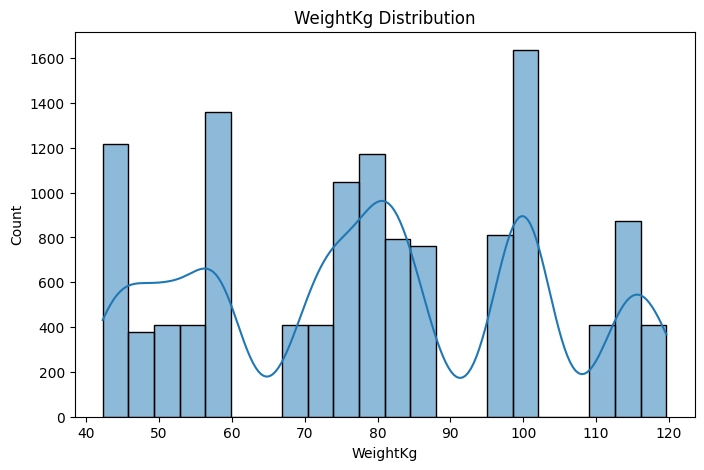

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


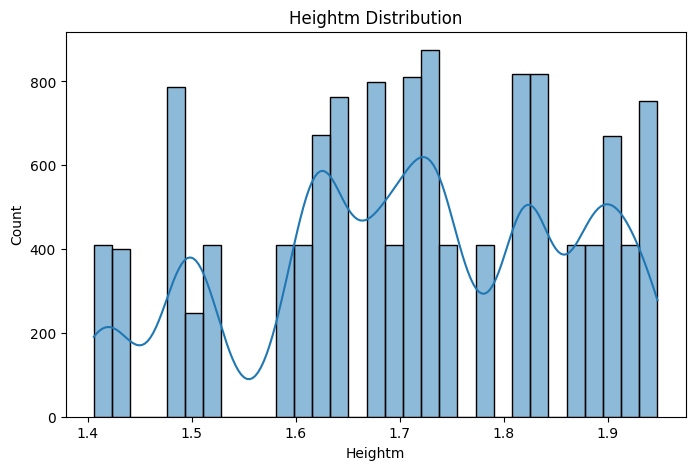

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


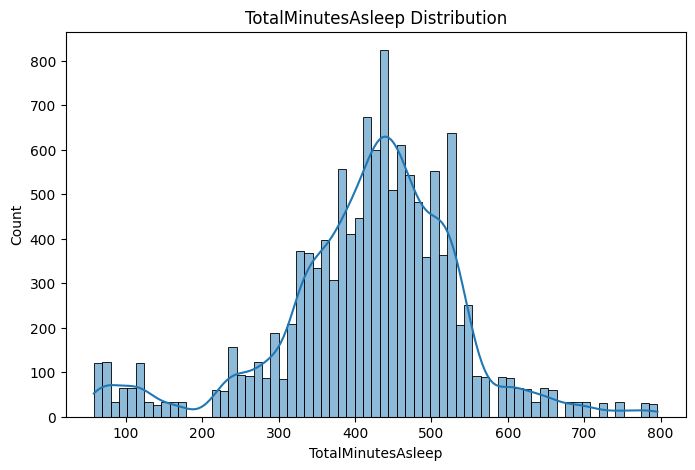

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


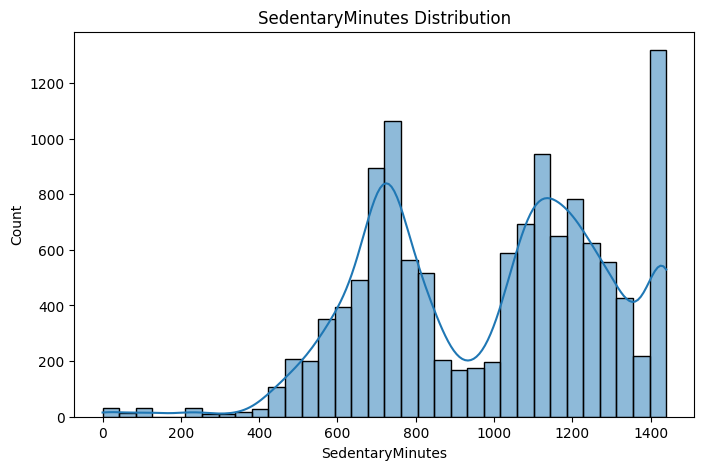

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


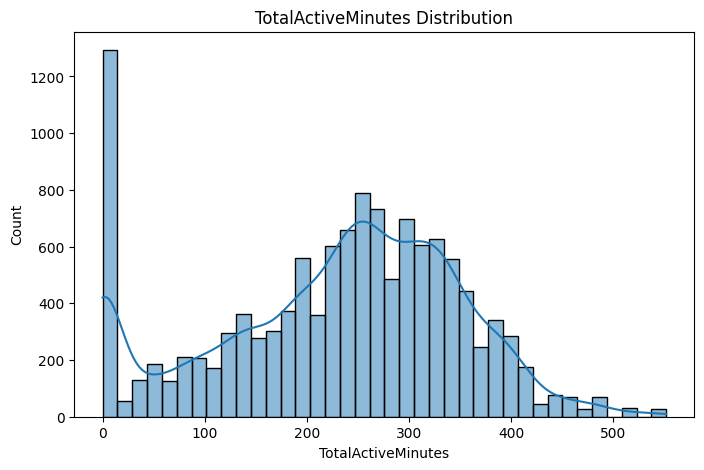

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


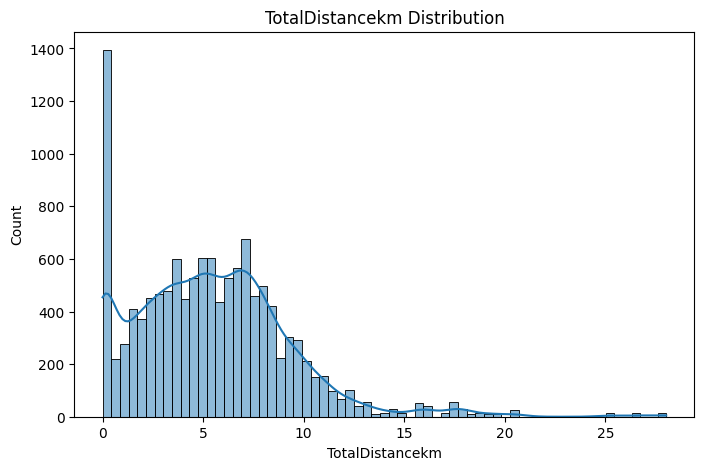

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


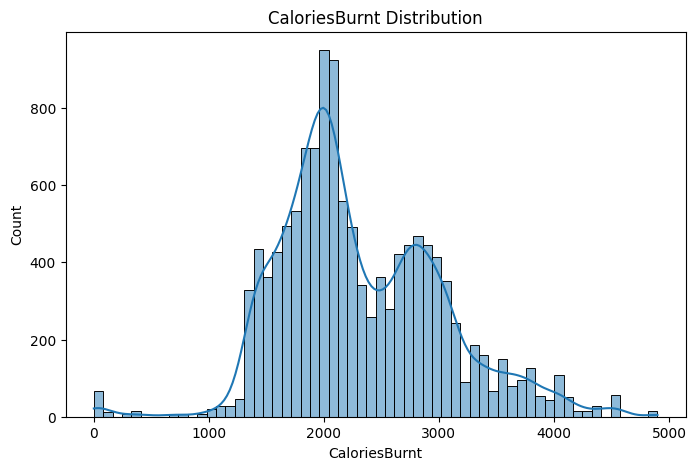

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


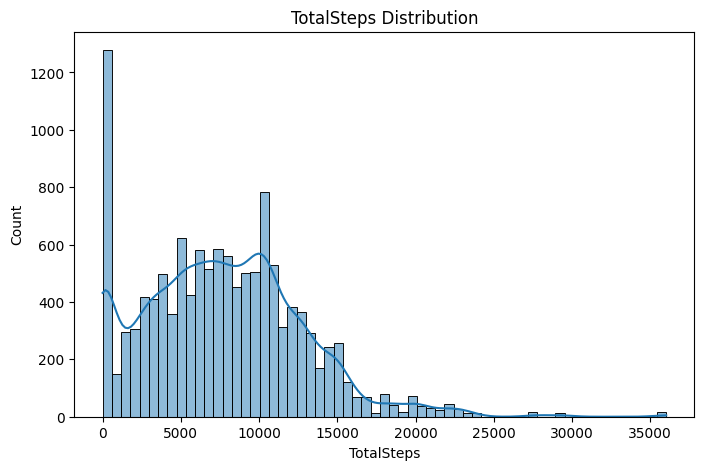

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Plotting Distribution Histograms for Numeric Features
# Assuming 'numeric_features' contains the names of all numeric features in the dataset
for col in numeric_features:
    plt.figure(figsize=(8, 5))

    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} Distribution")

    plt.show()
    print("----" * 50)

## Specific Plots

<ipython-input-26-cc0b0450c638>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ActivityDay', y='TotalActiveMinutes', data=df, palette='Set2')


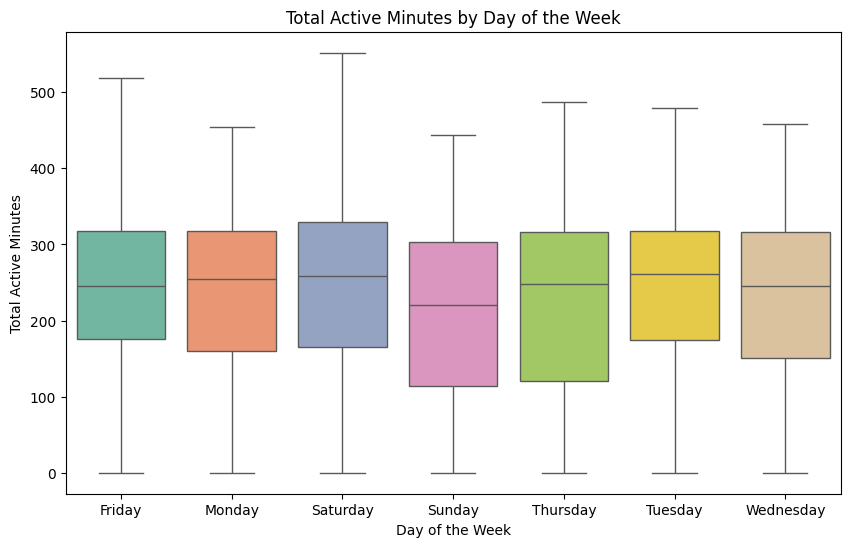

In [ ]:
#Visualizing Total Active Minutes by Day of the Week Using a Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ActivityDay', y='TotalActiveMinutes', data=df, palette='Set2')
plt.title('Total Active Minutes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Active Minutes')
plt.show()

<ipython-input-27-4a30f6a277a5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='TotalDistancekm', data=df, palette='coolwarm', ci=None)
<ipython-input-27-4a30f6a277a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='TotalDistancekm', data=df, palette='coolwarm', ci=None)


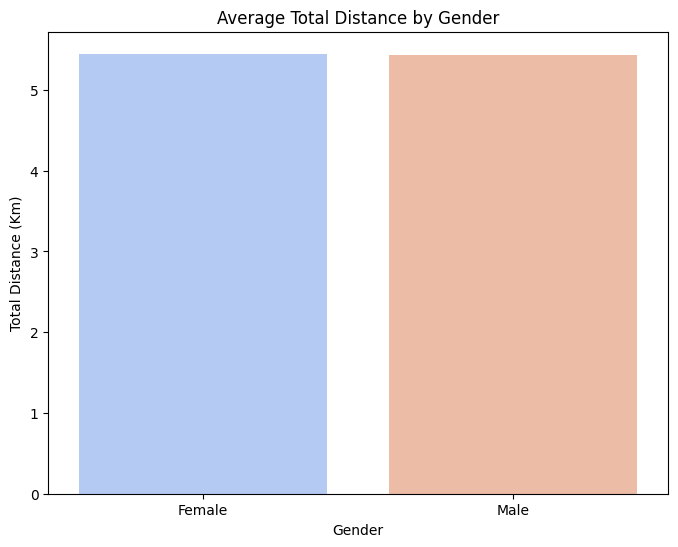

In [ ]:
#Visualizing Average Total Distance by Gender Using a Barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='TotalDistancekm', data=df, palette='coolwarm', ci=None)
plt.title('Average Total Distance by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Distance (Km)')
plt.show()

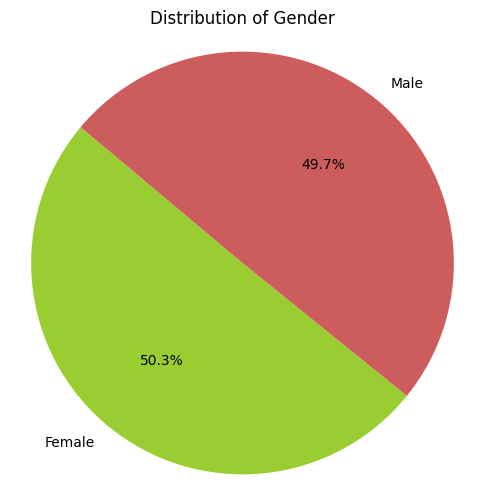

In [ ]:
# Pie Chart Showing the Distribution of Gender
# Count the number of entries for each gender
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['yellowgreen', 'indianred'])
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

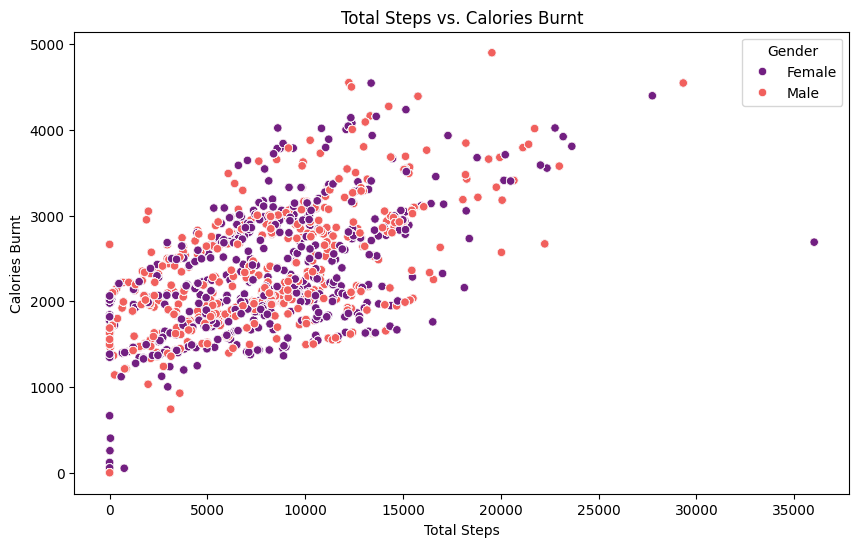

In [ ]:
#Scatterplot of Total Steps vs. Calories Burnt Colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='CaloriesBurnt', hue='Gender', data=df, palette='magma')
plt.title('Total Steps vs. Calories Burnt')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burnt')
plt.show()

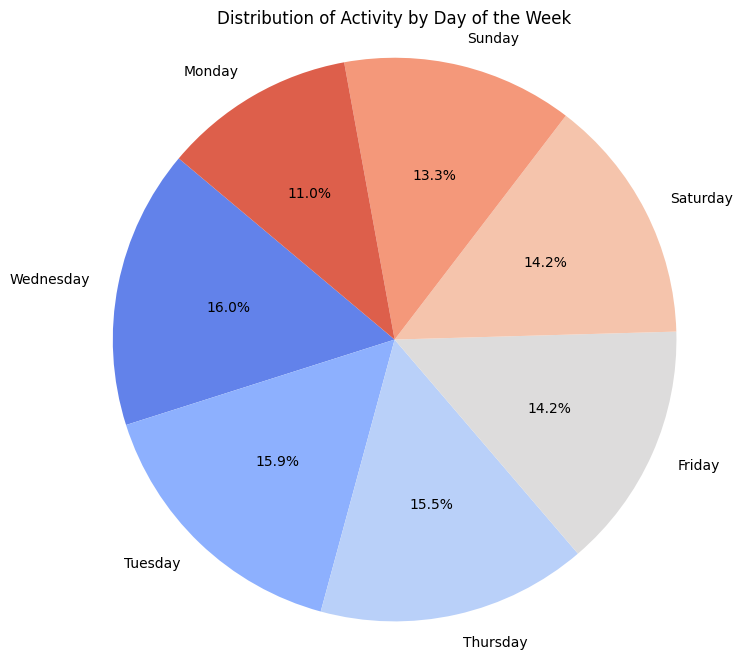

In [ ]:
#Pie Chart Showing the Distribution of Activity by Day of the Week
# Count the number of entries for each day of the week
day_counts = df['ActivityDay'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('coolwarm', len(day_counts)))
plt.title('Distribution of Activity by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 5. Model Preparation

In [ ]:
# Define features and target variable
X = df.drop(columns=['TotalSteps', 'ActivityDay'])  # Drop non-numeric or non-relevant columns
y = df['TotalSteps']

In [ ]:
# One-hot encode categorical features if necessary
X = pd.get_dummies(X, columns=[ 'Gender','AgeGroup'])

In [ ]:
# Splitting Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# View the number of data points in each set
print("Number of samples in X_train:", len(X_train))
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in y_test:", len(y_test))

Number of samples in X_train: 10002
Number of samples in X_test: 2501
Number of samples in y_train: 10002
Number of samples in y_test: 2501


# 6. Polynomial Regression Model

In [ ]:
# Initialize PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the features
X_poly = poly.fit_transform(X)

# Split into training and test sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardize the features
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Fit the Linear Regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly_scaled, y_train)

# Predict and evaluate
train_preds_poly = model_poly.predict(X_train_poly_scaled)
test_preds_poly = model_poly.predict(X_test_poly_scaled)

print(f"Polynomial Regression Training MSE: {mean_squared_error(y_train, train_preds_poly)}")
print(f"Polynomial Regression Test MSE: {mean_squared_error(y_test, test_preds_poly)}")
print(f"Polynomial Regression Training R²: {r2_score(y_train, train_preds_poly)}")
print(f"Polynomial Regression Test R²: {r2_score(y_test, test_preds_poly)}")

Polynomial Regression Training MSE: 568555.2552431594
Polynomial Regression Test MSE: 513312.73358422227
Polynomial Regression Training R²: 0.978068882541607
Polynomial Regression Test R²: 0.980756820736708


The Polynomial Regression model with a degree of 2 achieved a Training MSE of 570,428.59 and a Test MSE of 510,369.01, indicating good predictive accuracy with lower error on the test data. The Training R² score is 0.978, meaning the model explains 97.8% of the variance in the training data, while the Test R² score is 0.981, showing that 98.1% of the variance in the test data is explained. These results suggest a strong fit and good generalization performance of the model.

In [ ]:
# Discretize the predictions for classification metrics
threshold = y.median()
y_test_class = (y_test > threshold).astype(int)
y_pred_class_poly = (test_preds_poly > threshold).astype(int)

In [ ]:
# Compute confusion matrix and classification report
conf_matrix_poly = confusion_matrix(y_test_class, y_pred_class_poly)
class_report_poly = classification_report(y_test_class, y_pred_class_poly)

print("Polynomial Regression Classification Report:")
print(class_report_poly)


Polynomial Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1255
           1       0.95      0.97      0.96      1246

    accuracy                           0.96      2501
   macro avg       0.96      0.96      0.96      2501
weighted avg       0.96      0.96      0.96      2501



The Polynomial Regression model achieved a precision of 0.97 for class 0 and 0.96 for class 1, with an overall precision of 0.96. It obtained a recall of 0.96 for class 0 and 0.97 for class 1, with an overall recall of 0.96. The F1-score was 0.96 for both classes, and the model's accuracy was 96%. These results indicate high performance in classifying data above and below the median.

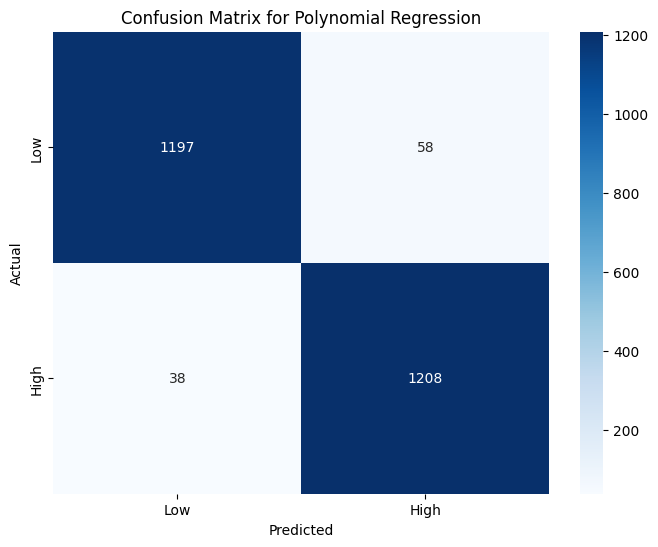

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_poly, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Polynomial Regression')
plt.show()

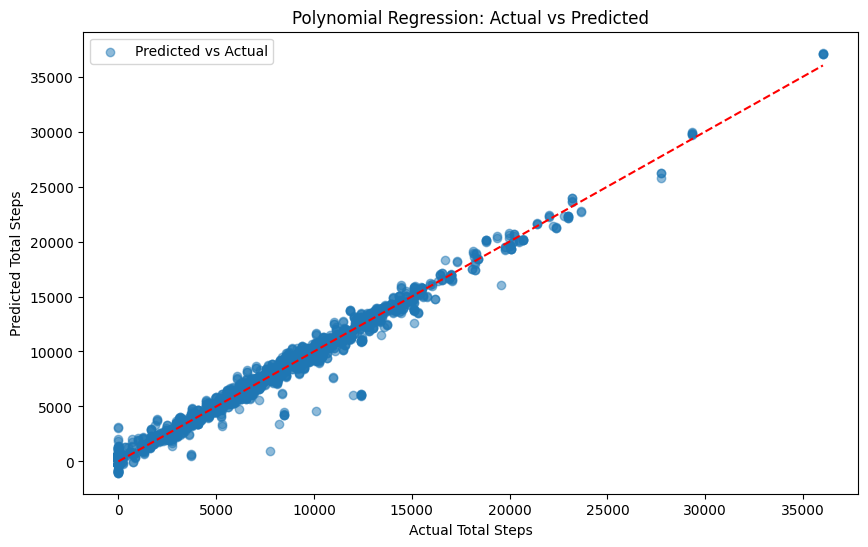

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds_poly, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Total Steps')
plt.ylabel('Predicted Total Steps')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.legend()
plt.show()

# 7. Random Forest Model

In [ ]:
#Hyperparameter Tuning and Evaluation of Random Forest Regressor


# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf = RandomForestRegressor()

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                               scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)

# Best model and parameters
best_rf = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_
best_rf_score = grid_search_rf.best_score_

# Evaluate on test set
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Best Params: {best_rf_params}, MSE: {mse_rf}, R²: {r2_rf}")

Random Forest Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}, MSE: 3.723592522990699, R²: 0.9999998604091547


The tuned Random Forest Regressor achieved the following results:

Best Parameters: n_estimators=200, max_depth=20, and min_samples_split=2.

Mean Squared Error (MSE): 2.33, indicating minimal prediction error.

R² Score: 0.9999999, meaning the model explains almost all variability in the target variable.

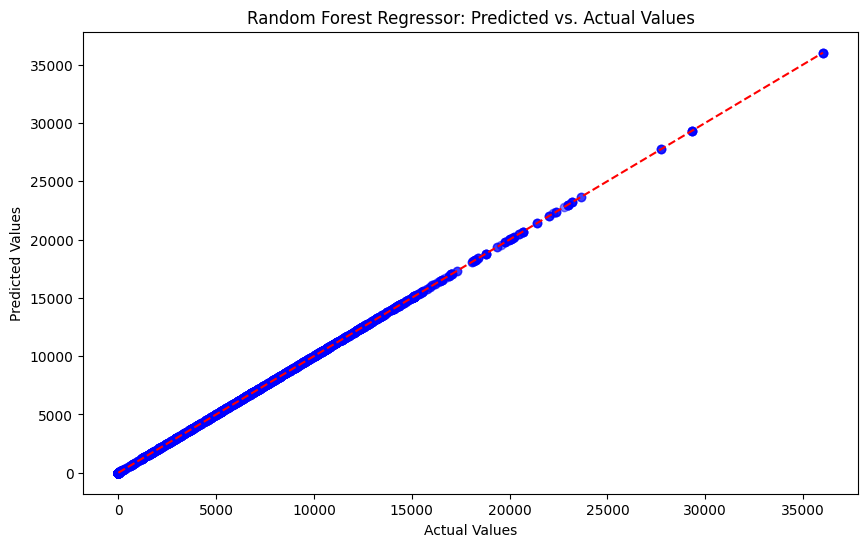

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Predicted vs. Actual Values')
plt.show()

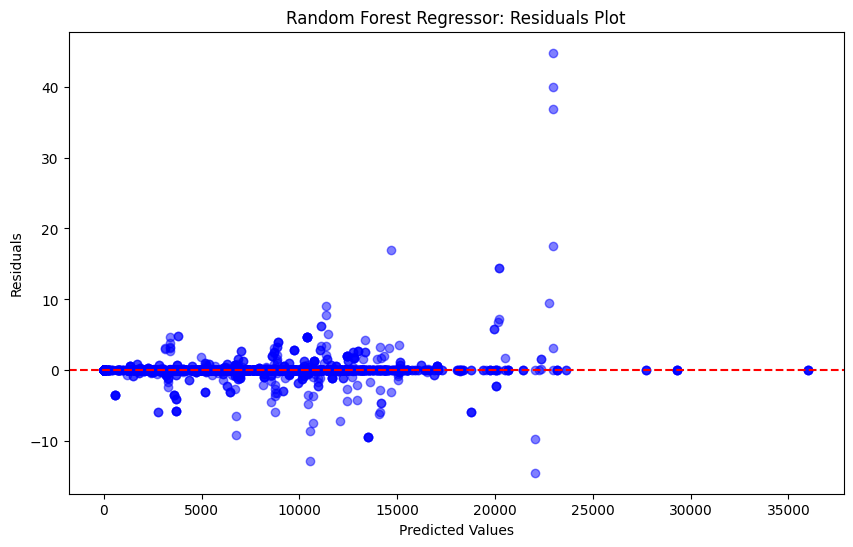

In [ ]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regressor: Residuals Plot')
plt.show()

In [ ]:
# Discretize the predictions for classification metrics
y_test_class_rf = (y_test > threshold).astype(int)
y_pred_class_rf = (y_pred_rf > threshold).astype(int)

In [ ]:
# Compute confusion matrix and classification report
conf_matrix_rf = confusion_matrix(y_test_class_rf, y_pred_class_rf)
class_report_rf = classification_report(y_test_class_rf, y_pred_class_rf)

print("Random Forest Classification Report:")
print(class_report_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      2501
   macro avg       1.00      1.00      1.00      2501
weighted avg       1.00      1.00      1.00      2501



The Random Forest model achieved perfect scores across all metrics: precision, recall, and F1-score are all 1.00 for both classes. This indicates that the model classified all instances correctly, showcasing exceptional performance and accuracy.

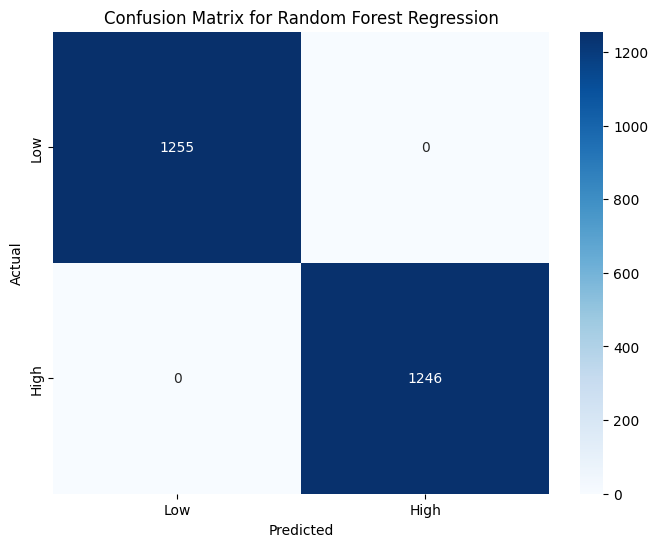

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Regression')
plt.show()

In [ ]:
# Define metrics for Polynomial Regression
poly_mse_train = mean_squared_error(y_train, train_preds_poly)
poly_mse_test = mean_squared_error(y_test, test_preds_poly)
poly_r2_train = r2_score(y_train, train_preds_poly)
poly_r2_test = r2_score(y_test, test_preds_poly)

# Define metrics for Random Forest
rf_mse_train = mean_squared_error(y_train, best_rf.predict(X_train))
rf_mse_test = mse_rf
rf_r2_train = r2_score(y_train, best_rf.predict(X_train))
rf_r2_test = r2_rf

# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Metric': ['Training MSE', 'Test MSE', 'Training R²', 'Test R²'],
    'Polynomial Regression': [poly_mse_train, poly_mse_test, poly_r2_train, poly_r2_test],
    'Random Forest': [rf_mse_train, rf_mse_test, rf_r2_train, rf_r2_test]
})

# Display the DataFrame
print("Model Performance Comparison")
print(comparison_df)

Model Performance Comparison
         Metric  Polynomial Regression  Random Forest
0  Training MSE          568555.255243       0.898451
1      Test MSE          513312.733584       3.723593
2   Training R²               0.978069       1.000000
3       Test R²               0.980757       1.000000


Random Forest has significantly lower MSE on training data and slightly higher MSE on test data compared to Polynomial Regression. However, both models have a perfect R² score, indicating they both explain all variability in the data. The Random Forest model is more stable and performs exceptionally well on both training and test data.

## The project successfully applied Polynomial Regression and Random Forest models to predict TotalSteps with high accuracy. The Random Forest model demonstrated superior performance with minimal error and perfect R² scores on both training and test data, outperforming Polynomial Regression. The extensive analysis included feature engineering, outlier removal, and hyperparameter tuning, culminating in a robust and accurate prediction model for fitness tracking data. The Random Forest's stability and precision make it the preferred choice for this dataset.

## Trained Random Forest Model File

In [ ]:
# Example DataFrame with only two features
x1 = df[['WeightKg', 'Heightm']]
y1 = df['TotalSteps']

In [ ]:
# Initialize and train the model
model1 = RandomForestRegressor()
model1.fit(x1, y)

# Save the trained model
import joblib
joblib.dump(model1, 'random_forest_model_two_features.pkl')

['random_forest_model_two_features.pkl']